In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling
import dtale
import numpy as np
%matplotlib inline

In [8]:
# Libraries for data pre-processing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split


In [9]:
# Libraries for modelling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Loading data file

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
dataset = pd.read_csv("C:/Input_Files/rosetta2021.csv")


In [9]:
dataset.head()

,CUSTOMER_TYPE,HOUSE_ID,Gender,MARITAL_STATUS,INCOME_CODE,Education,CHILDREN_NUM_HH,Age,Truckrolls,Unresolved_calls,TTS_TOTAL_TICKETS,TENURE_BY_ACTIVE_MO,VIDEO_DISCONNECT,CUSTOMER_DISCONNECT,CUSTOMER_DISCONNECT_DT,CUST_DISCON_REASON_NAME,CONTRACT_FLAG,CONTRACT_START_DATE,CONTRACT_TERM_PERIOD,CALC_MRC_CURR_MONTH,CALC_MRC_MONTH_01,NUMBER_OF_PRODUCTS,PREV_NUMBER_OF_PRODUCTS,Srvc_Dwngrd,PRODUCT_MIX,PREV_PRODUCT_MIX,PAYMENT_RECURRING
0,RESIDENTIAL,1760387610015,M,SGL,175-200K,GRAD,0,38,0,5,5,71,1,0,NaN,Too expensive,1,8/6/2021,12,65.95,220.84,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
1,RESIDENTIAL,2780412320066,F,SGL,<15K,HSCL,0,28,0,1,0,42,1,0,NaN,Too expensive,1,8/18/2021,12,79.95,133.69,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
2,RESIDENTIAL,2048193725261,F,SGL,35-50K,SCLG,0,66,0,1,0,127,1,0,NaN,Too expensive,1,8/7/2021,12,94.95,159.43,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
3,RESIDENTIAL,2301522010164,M,MRD,<15K,HSCL,0,47,0,3,0,47,1,0,NaN,Too expensive,0,?,0,119.95,215.24,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
4,RESIDENTIAL,1464000028586,M,MRD,150-175K,NHSD,0,52,0,1,0,127,1,0,NaN,Too expensive,0,?,0,100.95,180.37,1,2,1,HSD ONLY,VIDEO/HSD,1


In [10]:
dataset.describe()

,HOUSE_ID,CHILDREN_NUM_HH,Age,Truckrolls,Unresolved_calls,TTS_TOTAL_TICKETS,TENURE_BY_ACTIVE_MO,VIDEO_DISCONNECT,CUSTOMER_DISCONNECT,CONTRACT_FLAG,CONTRACT_TERM_PERIOD,CALC_MRC_CURR_MONTH,CALC_MRC_MONTH_01,NUMBER_OF_PRODUCTS,PREV_NUMBER_OF_PRODUCTS,Srvc_Dwngrd,PAYMENT_RECURRING
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,2.443718e+12,0.265000,48.729000,0.043250,0.641500,0.315000,62.843750,0.494750,0.004000,0.320750,5.478000,143.694625,180.649145,1.64625,2.339250,0.500500,0.392000
std,6.203815e+11,0.655273,15.019786,0.233223,1.128626,0.979548,46.724765,0.500035,0.063127,0.466823,8.705082,494.435586,494.148683,0.85076,0.741146,0.500062,0.488258
min,1.331937e+12,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.950000,9.950000,1.00000,1.000000,0.000000,0.000000
25%,1.970416e+12,0.000000,38.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,89.990000,128.087500,1.00000,2.000000,0.000000,0.000000
50%,2.199772e+12,0.000000,47.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,114.950000,170.190000,1.00000,2.000000,1.000000,0.000000
75%,2.747523e+12,0.000000,58.000000,0.000000,1.000000,0.000000,127.000000,1.000000,0.000000,1.000000,12.000000,177.427500,216.240000,2.00000,3.000000,1.000000,1.000000
max,4.579440e+12,6.000000,99.000000,3.000000,13.000000,15.000000,127.000000,1.000000,1.000000,1.000000,24.000000,31060.200000,31060.200000,4.00000,4.000000,1.000000,1.000000


In [11]:
dataset.dtypes

CUSTOMER_TYPE               object
HOUSE_ID                     int64
Gender                      object
MARITAL_STATUS              object
INCOME_CODE                 object
Education                   object
CHILDREN_NUM_HH              int64
Age                          int64
Truckrolls                   int64
Unresolved_calls             int64
TTS_TOTAL_TICKETS            int64
TENURE_BY_ACTIVE_MO          int64
VIDEO_DISCONNECT             int64
CUSTOMER_DISCONNECT          int64
CUSTOMER_DISCONNECT_DT      object
CUST_DISCON_REASON_NAME     object
CONTRACT_FLAG                int64
CONTRACT_START_DATE         object
CONTRACT_TERM_PERIOD         int64
CALC_MRC_CURR_MONTH        float64
CALC_MRC_MONTH_01          float64
NUMBER_OF_PRODUCTS           int64
PREV_NUMBER_OF_PRODUCTS      int64
Srvc_Dwngrd                  int64
PRODUCT_MIX                 object
PREV_PRODUCT_MIX            object
PAYMENT_RECURRING            int64
dtype: object

In [12]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['HOUSE_ID', 'CHILDREN_NUM_HH', 'Age', 'Truckrolls', 'Unresolved_calls', 'TTS_TOTAL_TICKETS', 'TENURE_BY_ACTIVE_MO', 'VIDEO_DISCONNECT', 'CUSTOMER_DISCONNECT', 'CONTRACT_FLAG', 'CONTRACT_TERM_PERIOD', 'NUMBER_OF_PRODUCTS', 'PREV_NUMBER_OF_PRODUCTS', 'Srvc_Dwngrd', 'PAYMENT_RECURRING'], float64: ['CALC_MRC_CURR_MONTH', 'CALC_MRC_MONTH_01'], object: ['CUSTOMER_TYPE', 'Gender', 'MARITAL_STATUS', 'INCOME_CODE', 'Education', 'CUSTOMER_DISCONNECT_DT', 'CUST_DISCON_REASON_NAME', 'CONTRACT_START_DATE', 'PRODUCT_MIX', 'PREV_PRODUCT_MIX']}

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUSTOMER_TYPE            4000 non-null   object 
 1   HOUSE_ID                 4000 non-null   int64  
 2   Gender                   4000 non-null   object 
 3   MARITAL_STATUS           4000 non-null   object 
 4   INCOME_CODE              4000 non-null   object 
 5   Education                4000 non-null   object 
 6   CHILDREN_NUM_HH          4000 non-null   int64  
 7   Age                      4000 non-null   int64  
 8   Truckrolls               4000 non-null   int64  
 9   Unresolved_calls         4000 non-null   int64  
 10  TTS_TOTAL_TICKETS        4000 non-null   int64  
 11  TENURE_BY_ACTIVE_MO      4000 non-null   int64  
 12  VIDEO_DISCONNECT         4000 non-null   int64  
 13  CUSTOMER_DISCONNECT      4000 non-null   int64  
 14  CUSTOMER_DISCONNECT_DT  

In [14]:
# checking for values listed as NA
dataset.isna().any()

CUSTOMER_TYPE              False
HOUSE_ID                   False
Gender                     False
MARITAL_STATUS             False
INCOME_CODE                False
Education                  False
CHILDREN_NUM_HH            False
Age                        False
Truckrolls                 False
Unresolved_calls           False
TTS_TOTAL_TICKETS          False
TENURE_BY_ACTIVE_MO        False
VIDEO_DISCONNECT           False
CUSTOMER_DISCONNECT        False
CUSTOMER_DISCONNECT_DT      True
CUST_DISCON_REASON_NAME     True
CONTRACT_FLAG              False
CONTRACT_START_DATE        False
CONTRACT_TERM_PERIOD       False
CALC_MRC_CURR_MONTH        False
CALC_MRC_MONTH_01          False
NUMBER_OF_PRODUCTS         False
PREV_NUMBER_OF_PRODUCTS    False
Srvc_Dwngrd                False
PRODUCT_MIX                False
PREV_PRODUCT_MIX           False
PAYMENT_RECURRING          False
dtype: bool

In [15]:
# checking for unique values in dataset

#Unique values in each categorical variable:
dataset["CALC_MRC_CURR_MONTH"].nunique()
dataset["CALC_MRC_CURR_MONTH"].unique()
dataset["CONTRACT_FLAG"].nunique()
dataset["CONTRACT_FLAG"].unique()

array([1, 0], dtype=int64)

In [16]:
# average and fill missing values

na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [17]:
# Revalidate NA’s

dataset.isna().any()

CUSTOMER_TYPE              False
HOUSE_ID                   False
Gender                     False
MARITAL_STATUS             False
INCOME_CODE                False
Education                  False
CHILDREN_NUM_HH            False
Age                        False
Truckrolls                 False
Unresolved_calls           False
TTS_TOTAL_TICKETS          False
TENURE_BY_ACTIVE_MO        False
VIDEO_DISCONNECT           False
CUSTOMER_DISCONNECT        False
CUSTOMER_DISCONNECT_DT      True
CUST_DISCON_REASON_NAME     True
CONTRACT_FLAG              False
CONTRACT_START_DATE        False
CONTRACT_TERM_PERIOD       False
CALC_MRC_CURR_MONTH        False
CALC_MRC_MONTH_01          False
NUMBER_OF_PRODUCTS         False
PREV_NUMBER_OF_PRODUCTS    False
Srvc_Dwngrd                False
PRODUCT_MIX                False
PREV_PRODUCT_MIX           False
PAYMENT_RECURRING          False
dtype: bool

In [44]:
# Replace Customer_Type
#df.replace({'CUSTOMER_TYPE':{'RESIDENTIAL':45, 'BUSINESS SERVICES':79}})

dataset['CUSTOMER_TYPE'] = dataset['CUSTOMER_TYPE'].replace(['RESIDENTIAL'],'45')

dataset['CUSTOMER_TYPE'] = dataset['CUSTOMER_TYPE'].replace(['BUSINESS SERVICES'],'79')


In [45]:
# REPLACE MARITAL STATUS
#df.replace({'MARITAL_STATUS':{'MRD':22, 'SGL':25}})

dataset['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace(['MRD'],'22')

dataset['MARITAL_STATUS'] = df['MARITAL_STATUS'].replace(['SGL'],'25')

In [46]:
dataset.head()

,CUSTOMER_TYPE,HOUSE_ID,Gender,MARITAL_STATUS,INCOME_CODE,Education,CHILDREN_NUM_HH,Age,Truckrolls,Unresolved_calls,TTS_TOTAL_TICKETS,TENURE_BY_ACTIVE_MO,VIDEO_DISCONNECT,CUSTOMER_DISCONNECT,CUSTOMER_DISCONNECT_DT,CUST_DISCON_REASON_NAME,CONTRACT_FLAG,CONTRACT_START_DATE,CONTRACT_TERM_PERIOD,CALC_MRC_CURR_MONTH,CALC_MRC_MONTH_01,NUMBER_OF_PRODUCTS,PREV_NUMBER_OF_PRODUCTS,Srvc_Dwngrd,PRODUCT_MIX,PREV_PRODUCT_MIX,PAYMENT_RECURRING
0,45,1760387610015,M,25,175-200K,GRAD,0,38,0,5,5,71,1,0,NaN,Too expensive,1,8/6/2021,12,65.95,220.84,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
1,45,2780412320066,F,25,<15K,HSCL,0,28,0,1,0,42,1,0,NaN,Too expensive,1,8/18/2021,12,79.95,133.69,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
2,45,2048193725261,F,25,35-50K,SCLG,0,66,0,1,0,127,1,0,NaN,Too expensive,1,8/7/2021,12,94.95,159.43,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
3,45,2301522010164,M,22,<15K,HSCL,0,47,0,3,0,47,1,0,NaN,Too expensive,0,?,0,119.95,215.24,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
4,45,1464000028586,M,22,150-175K,NHSD,0,52,0,1,0,127,1,0,NaN,Too expensive,0,?,0,100.95,180.37,1,2,1,HSD ONLY,VIDEO/HSD,1


In [51]:
#create profile file
profile = df.profile_report(title="profile")
profile.to_file(output_file="C:/Output_Files/rosetta_profile.html")

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

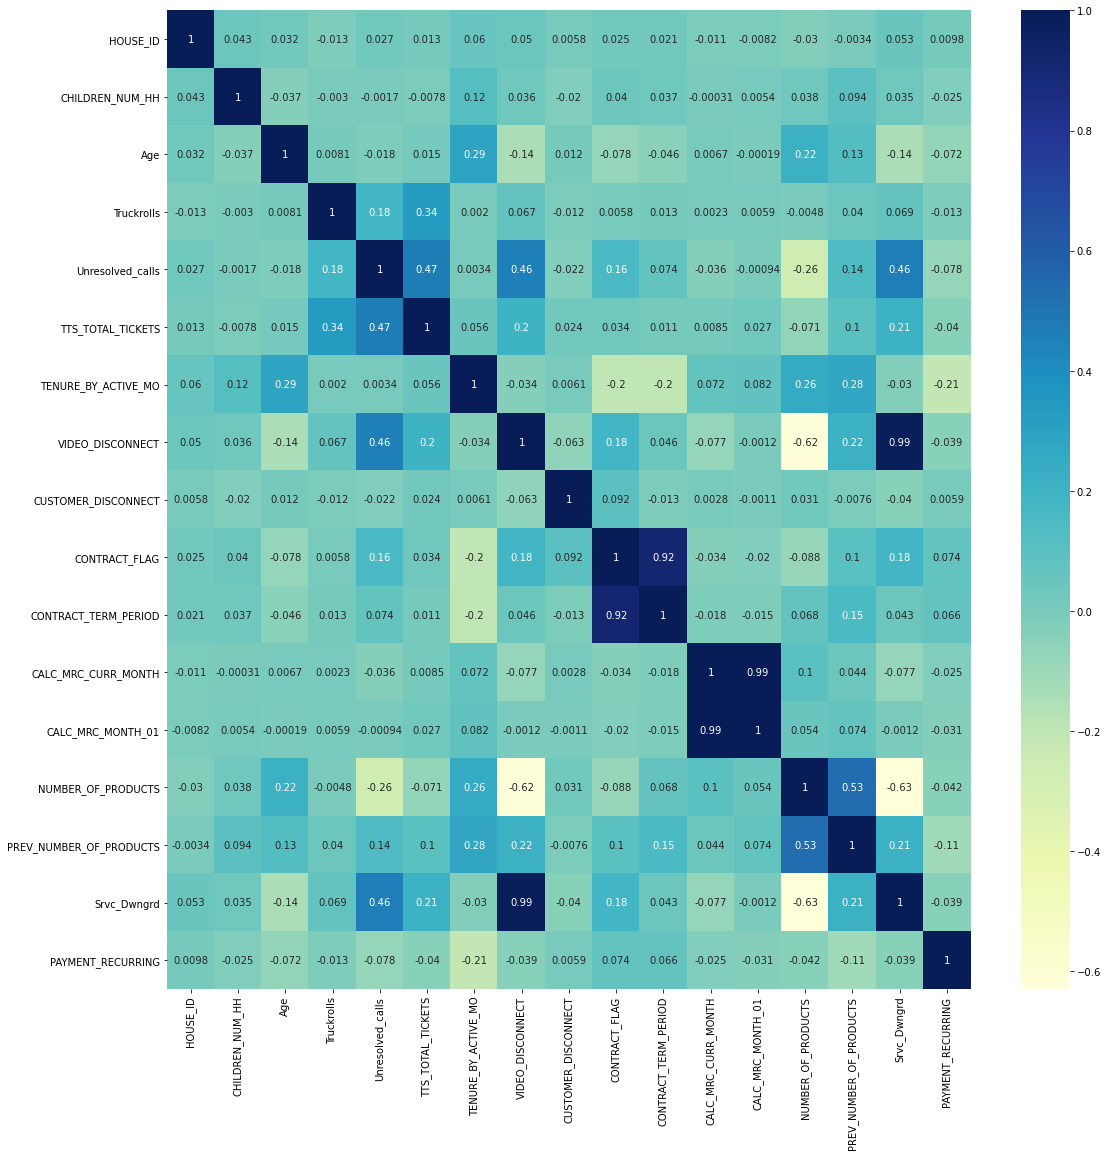

In [52]:
#correlation
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

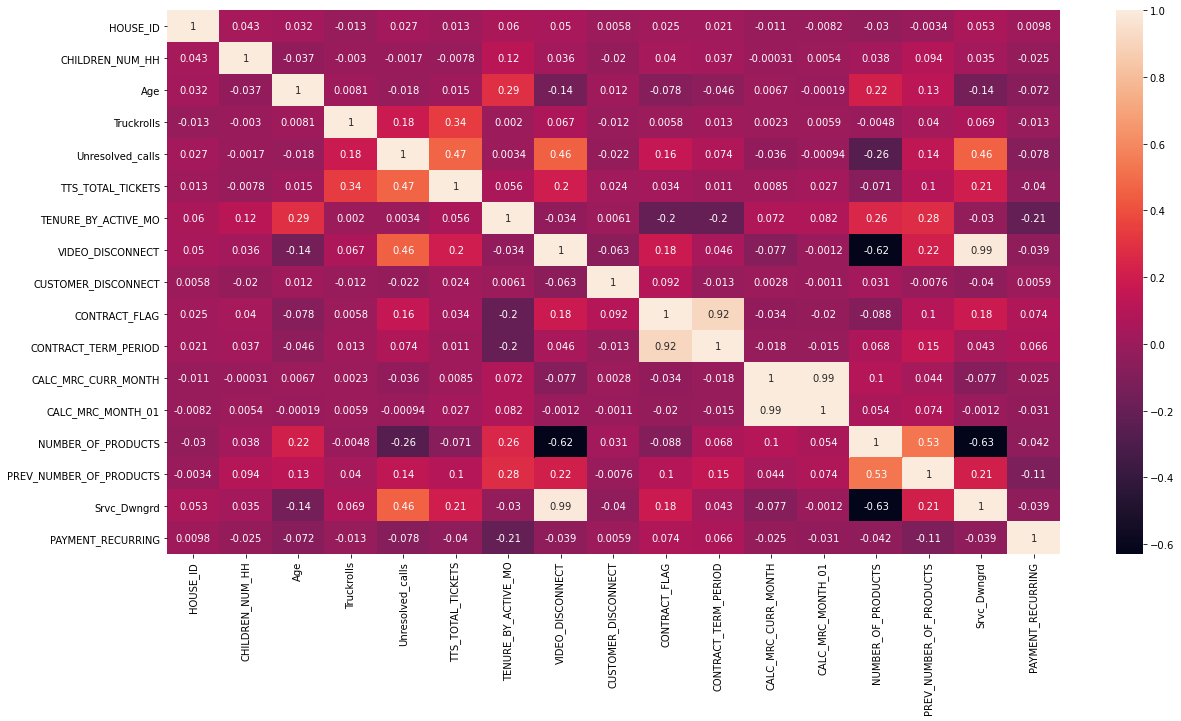

In [54]:
#manual correlation matrix
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(dataset,show_chart=True)

<AxesSubplot:ylabel='Frequency'>

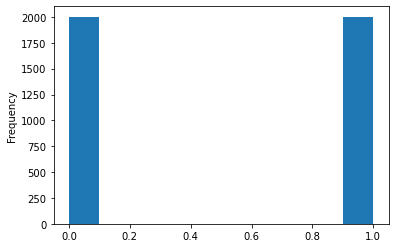

In [55]:
#histograms for variables - Srvc_Dwngrd
import matplotlib.pyplot as plt
dataset['Srvc_Dwngrd'].plot(kind='hist')

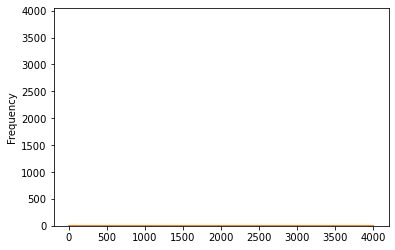

In [56]:
#Histogram for truckrolls
df['Truckrolls'].plot(kind='hist')
# as truck rolls have 4 values in number of truck rolls from 0-4 it is better to categorize this way in a line plot:
plt.plot(df['Truckrolls'])

(array([3850.,  130.,   20.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

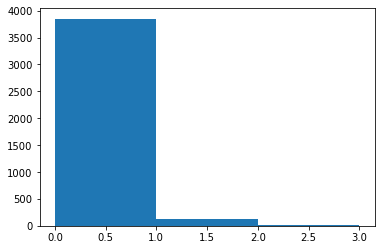

In [57]:
# choosing the number of bins to get a better graph
plt.hist(df['Truckrolls'],bins=3)


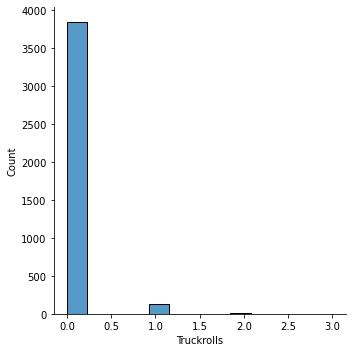

In [58]:
# histogram using seaborn libraries
import seaborn as sns
sns.displot(df['Truckrolls'])


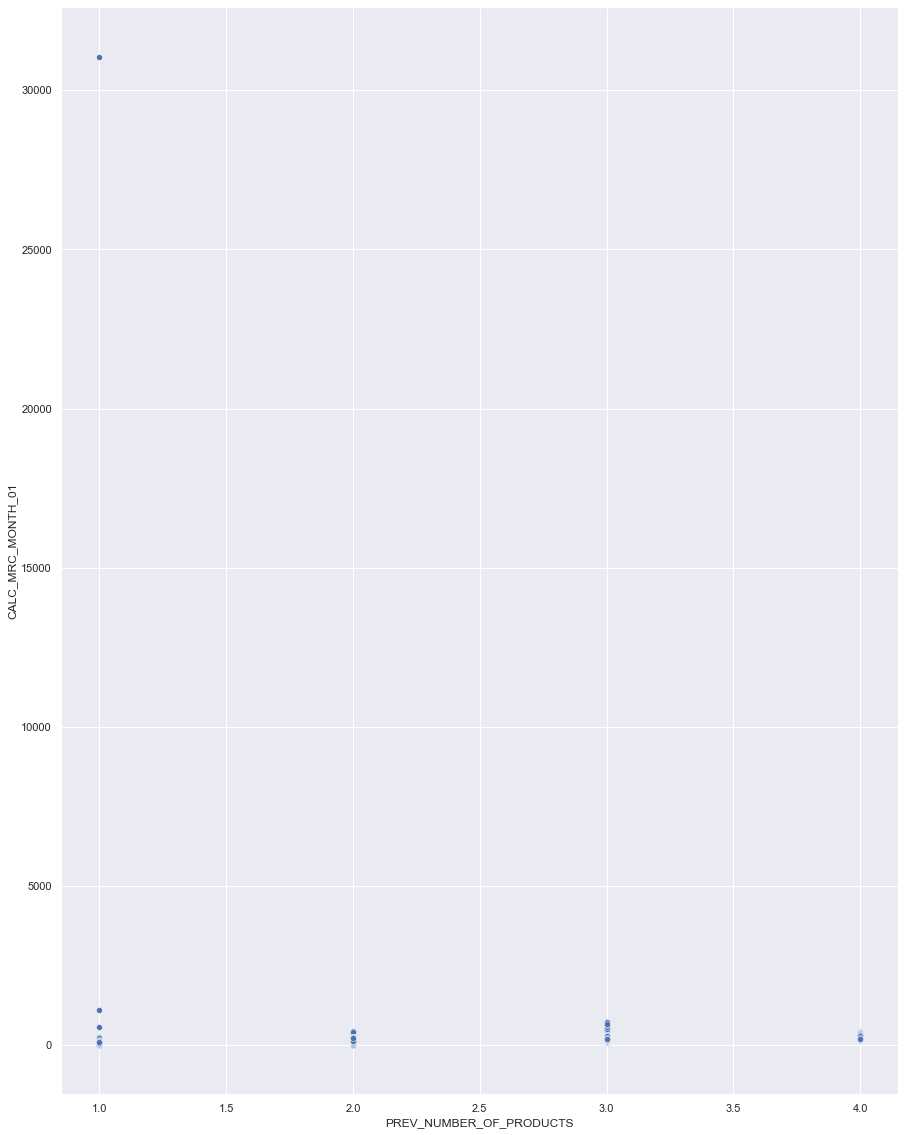

In [59]:
#scatter plots
import seaborn as sns
 
sns.set(rc = {'figure.figsize':(15,20)})
sns.scatterplot(data = df, x = "PREV_NUMBER_OF_PRODUCTS", y = "CALC_MRC_MONTH_01")

plt.show()

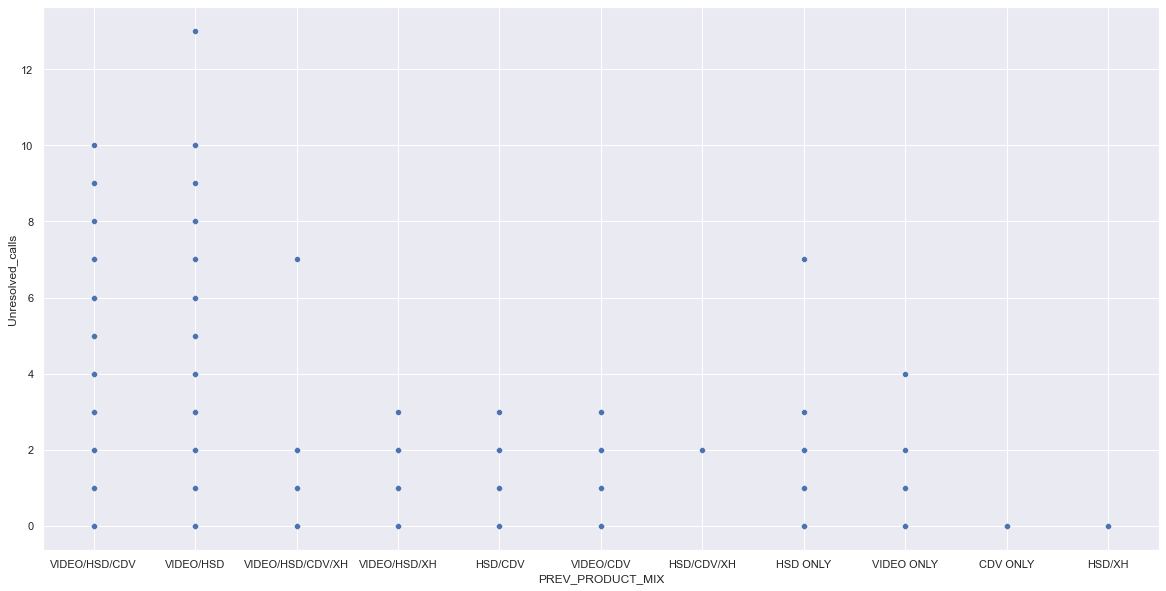

In [60]:
#FINAL SCATTER PLOT

import seaborn as sns
sns.set(rc = {'figure.figsize':(20,10)})
sns.scatterplot(data = df, x = "PREV_PRODUCT_MIX", y = "Unresolved_calls")
plt.show()

<AxesSubplot:ylabel='Srvc_Dwngrd'>

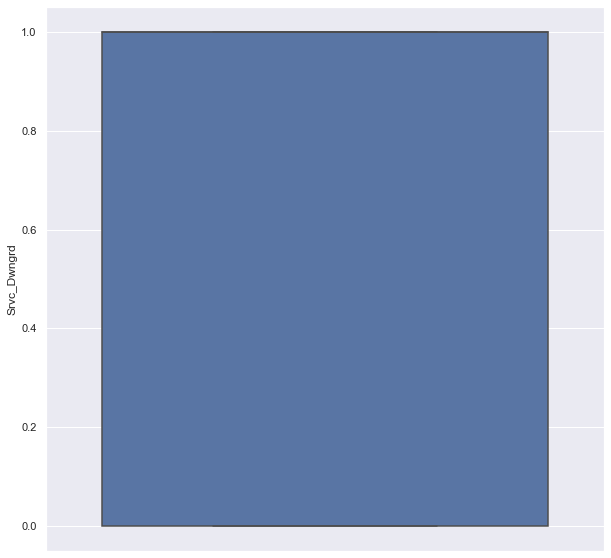

In [62]:
#checking for outliers - Box plots
plt.figure(figsize=(10,10))
sns.boxplot(y='Srvc_Dwngrd',data=df)

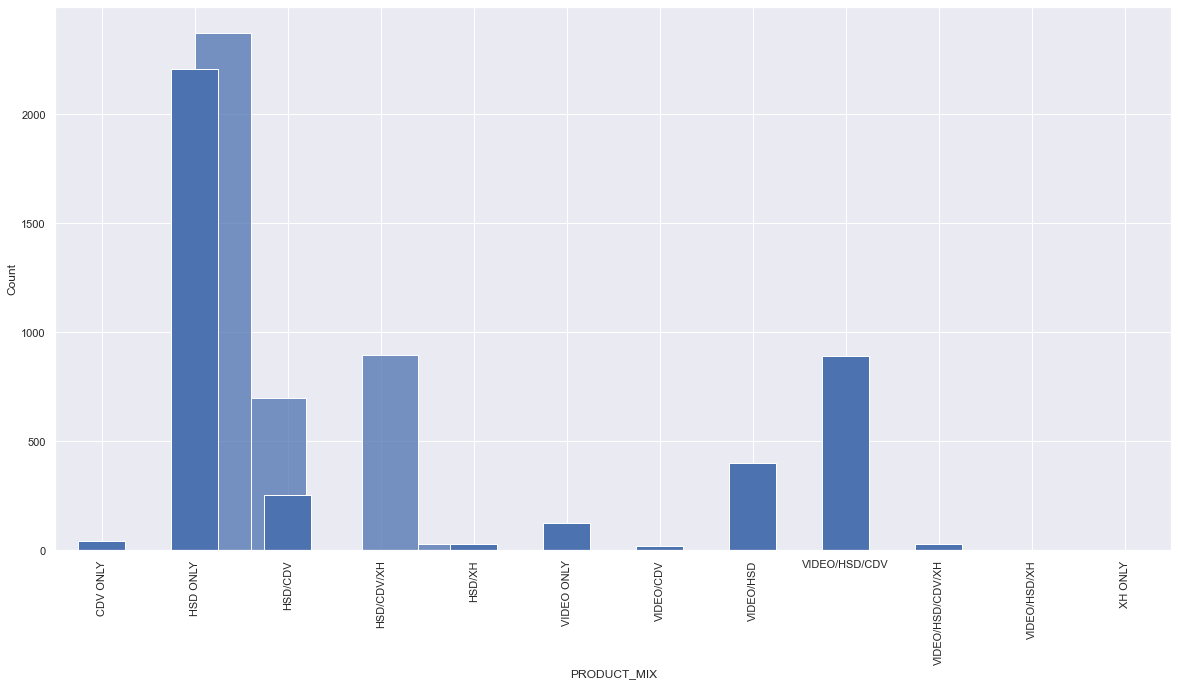

In [63]:
#histograms for variable Vs. count
sns.histplot(df.NUMBER_OF_PRODUCTS,bins=5)

# HISTOGRAMS GROUP BY SHOWING BEFORE AND AFTER
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('PRODUCT_MIX')['HOUSE_ID'].nunique().plot(kind='bar')
plt.show()

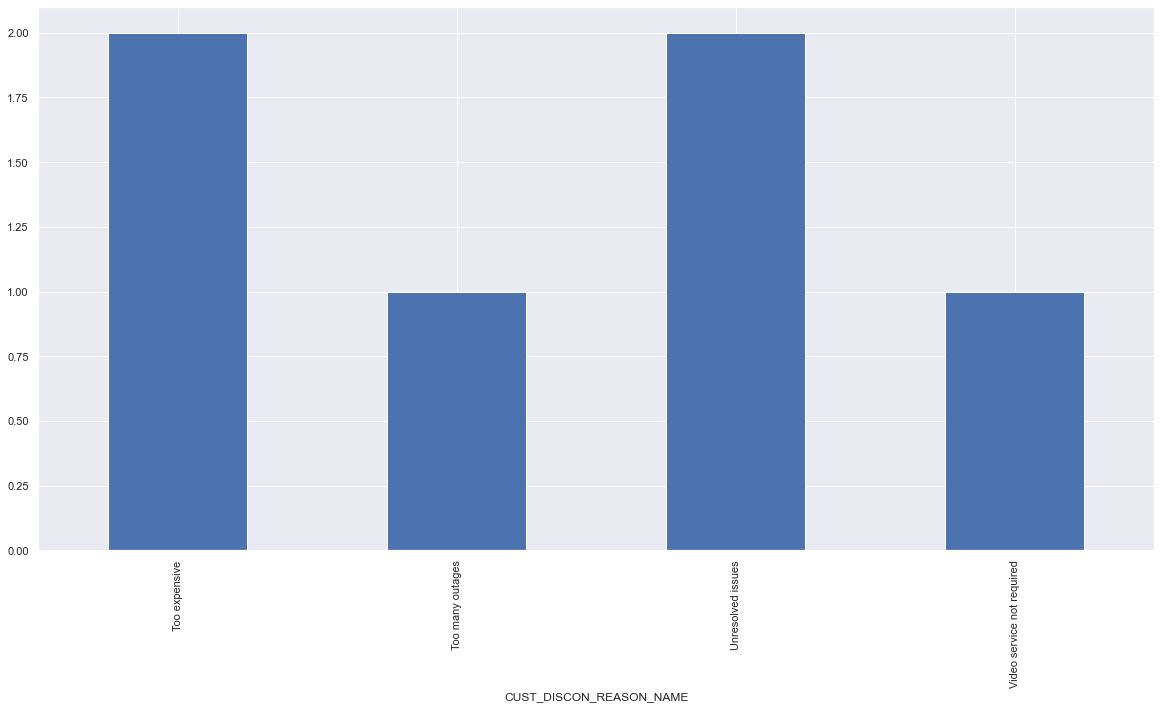

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('CUST_DISCON_REASON_NAME')['VIDEO_DISCONNECT'].nunique().plot(kind='bar')
plt.show()


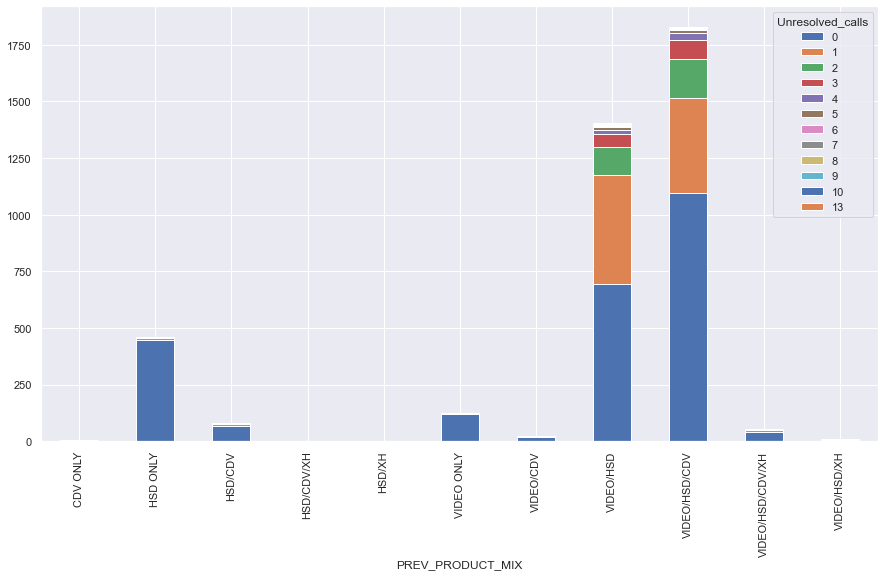

In [65]:
#stacked bar chart
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (15, 8)
df.groupby(['PREV_PRODUCT_MIX','Unresolved_calls']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

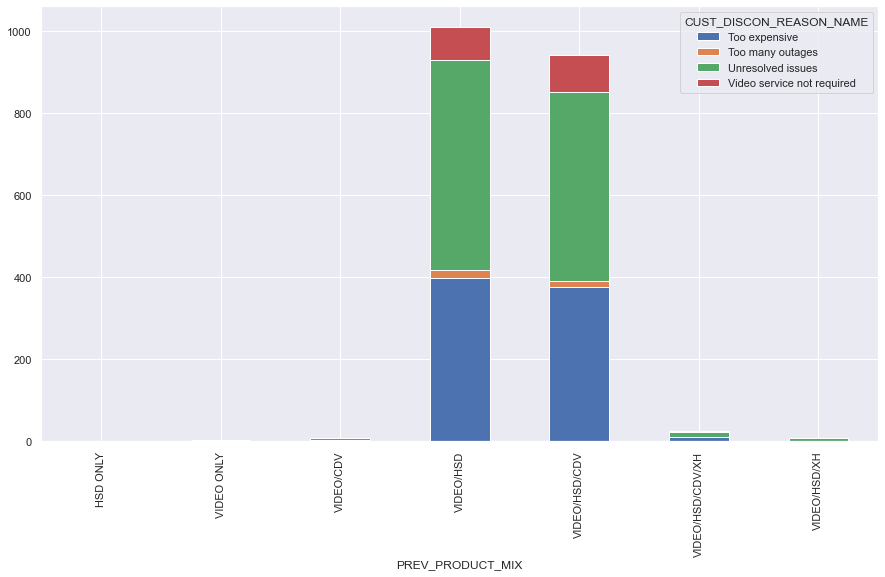

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (15, 8)
df.groupby(['PREV_PRODUCT_MIX','CUST_DISCON_REASON_NAME']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [67]:
# probability plot
import scipy.stats as stats


In [68]:
#SUM OF Values in one column based on filter condition from other
df.loc[df['VIDEO_DISCONNECT'] == 1, 'CALC_MRC_MONTH_01'].sum() 
#this means sum the MRC where video disconnect=1

df.loc[df['VIDEO_DISCONNECT'] == 1, 'CALC_MRC_CURR_MONTH'].sum()

208350.76000000004

In [69]:
# break out values in a column
df.groupby(['Truckrolls']).size()
df.loc[df['Truckrolls'] == 2]


,CUSTOMER_TYPE,HOUSE_ID,Gender,MARITAL_STATUS,INCOME_CODE,Education,CHILDREN_NUM_HH,Age,Truckrolls,Unresolved_calls,TTS_TOTAL_TICKETS,TENURE_BY_ACTIVE_MO,VIDEO_DISCONNECT,CUSTOMER_DISCONNECT,CUSTOMER_DISCONNECT_DT,CUST_DISCON_REASON_NAME,CONTRACT_FLAG,CONTRACT_START_DATE,CONTRACT_TERM_PERIOD,CALC_MRC_CURR_MONTH,CALC_MRC_MONTH_01,NUMBER_OF_PRODUCTS,PREV_NUMBER_OF_PRODUCTS,Srvc_Dwngrd,PRODUCT_MIX,PREV_PRODUCT_MIX,PAYMENT_RECURRING
116,45,3290531400046,M,22,100-125K,COLG,1,32,2,2,2,127,1,0,NaN,Too expensive,0,?,0,94.95,170.19,1,2,1,HSD ONLY,VIDEO/HSD,0
139,79,2135765210044,M,25,50-75K,GRAD,0,24,2,4,7,105,1,0,NaN,Too expensive,0,?,0,197.94,226.85,2,3,1,HSD/CDV,VIDEO/HSD/CDV,0
421,79,2110250000309,M,22,200-250K,GRAD,0,48,2,3,1,30,1,0,NaN,Too expensive,0,?,0,303.39,286.80,2,3,1,HSD/CDV,VIDEO/HSD/CDV,0
449,79,2360732010521,M,22,75-100K,SCLG,0,50,2,0,0,40,1,0,NaN,Too expensive,0,?,0,373.33,601.60,2,3,1,HSD/CDV,VIDEO/HSD/CDV,0
523,45,2126233910026,M,25,15-25K,NHSD,0,42,2,2,2,1,1,0,NaN,Video service not required,1,7/10/2021,24,112.98,213.79,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
528,79,3258652400004,M,22,75-100K,HSCL,0,51,2,2,1,127,1,0,NaN,Video service not required,0,?,0,383.14,362.45,2,3,1,HSD/CDV,VIDEO/HSD/CDV,1
541,45,3878270405109,M,22,35-50K,SCLG,0,40,2,0,0,13,1,0,NaN,Video service not required,0,?,0,79.00,152.69,1,2,1,HSD ONLY,VIDEO/HSD,0
701,79,1841260710112,M,25,<15K,NHSD,0,37,2,0,3,127,1,0,NaN,Too expensive,0,?,0,378.30,537.60,2,3,1,HSD/CDV,VIDEO/HSD/CDV,1
869,45,2601242910043,M,25,25-35K,SCLG,0,53,2,3,3,120,1,0,NaN,Unresolved issues,0,?,0,114.95,194.74,1,3,1,HSD ONLY,VIDEO/HSD/CDV,0
935,79,3079248200009,M,22,50-75K,SCLG,0,50,2,4,4,76,1,0,NaN,Unresolved issues,0,?,0,62.33,120.19,1,2,1,HSD ONLY,VIDEO/HSD,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



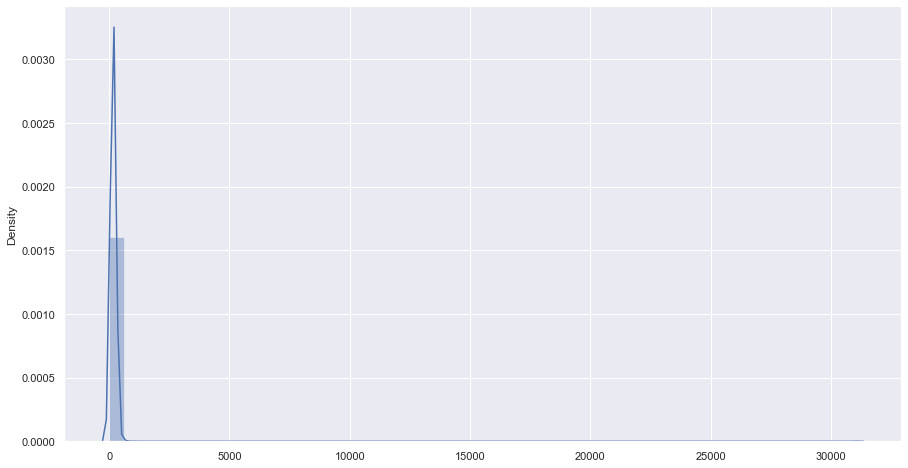

In [70]:
#normal graph for a variable
data = pd.DataFrame(dataset['CALC_MRC_MONTH_01'])
res = sns.distplot(data)
plt.show()

In [36]:
# BEGIN LOGISTIC REGRESSION

#split dataset in features and target variable
feature_cols = ['Truckrolls', 'Unresolved_calls', 'TTS_TOTAL_TICKETS', 'CONTRACT_FLAG','VIDEO_DISCONNECT']
X = dataset[feature_cols] # Features
y = dataset.Srvc_Dwngrd # Target variable


In [37]:
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [39]:
# import the class
from sklearn.linear_model import LogisticRegression

In [28]:

# import the class
from sklearn.linear_model import LogisticRegression

In [40]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [30]:
# fit the model with data
logreg.fit(X_train,y_train)

ValueError: could not convert string to float: 'Unresolved issues'

In [20]:
y_pred=logreg.predict(X_test)

In [21]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[490,   1],
       [  6, 503]], dtype=int64)

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

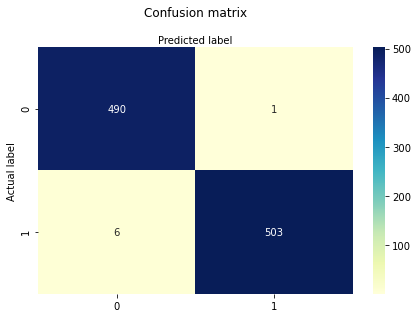

In [23]:
#Analyzing confusion matrix with heat map

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# Confusion Matrix Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.993
Precision: 0.998015873015873
Recall: 0.9882121807465619
